In [143]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [20]:
# Reading Data
data = pd.read_csv("./personas/Data/orignal_data.csv")

# Details about Data
print(data.shape)
print(data.info())
data.head()

(19, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Feature1        19 non-null     float64
 1   Feature2        19 non-null     float64
 2   Feature3        19 non-null     float64
 3   Feature4        19 non-null     float64
 4   Feature5        19 non-null     float64
 5   Feature6        19 non-null     float64
 6   Feature7        19 non-null     float64
 7   Feature8        19 non-null     float64
 8   Feature9        19 non-null     float64
 9   Feature10       19 non-null     float64
 10  Feature11       19 non-null     float64
 11  Feature12       19 non-null     float64
 12  Feature13       19 non-null     float64
 13  Feature14       19 non-null     float64
 14  Feature15       19 non-null     float64
 15  Feature16       19 non-null     float64
 16  Feature17       19 non-null     float64
 17  Feature18       19 non-null 

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Classification,Name
0,83219.109520,210948.176400,180510.466500,98728.743610,27543.085790,66676.482580,243057.415100,239077.680500,122858.377200,27822.102150,...,6610.444730,9063.367307,4779.714360,49330.533950,228771.702500,179332.768500,77530.030760,22433.643770,0,Affan
1,408.478847,552.856807,279.720935,139.552483,55.531824,51.291982,21.990994,13.856212,148.732012,127.887662,...,48.762642,23.393015,10.342348,427.536492,311.108609,160.807982,57.862649,27.892496,0,Ayaan
2,113.804208,154.648224,123.413631,217.200684,126.053551,83125.869860,411144.733900,239140.363400,89824.611230,26369.770670,...,19594.456300,16461.905570,8222.217247,169.524497,275.441340,168.337902,303.713557,186.593353,0,Nathalia
3,690.106275,805.727685,793.254671,226.598873,159.672897,16054.053980,67395.171510,38592.634140,21359.431040,4042.833433,...,35644.327590,11853.070920,5542.769994,139.474321,148.580005,155.486300,62.280820,46.033488,0,Usaid
4,81.927957,30.325076,35.173677,64.613543,46.072527,50579.449490,140914.975400,435993.077900,104663.974800,35555.928180,...,10447.497440,12626.135910,7666.972031,430.730427,254.344695,201.456413,261.125834,138.514533,0,Victoria


In [21]:
#Normalizing Data:
features = data.iloc[:,:-2] 
labels = data.loc[:,"Classification"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df['Classification'] = labels
features_scaled_df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Classification
0,3.786643,4.235569,4.242266,4.242406,1.338020,0.512118,1.600833,1.530449,2.687013,-0.474821,...,0.051818,0.241155,1.179158,-0.654540,1.918169,4.232832,4.242241,4.242232,0.290277,0
1,-0.327372,-0.241365,-0.234144,-0.235459,-0.358574,-1.011474,-0.639046,-0.556160,-0.761928,-0.807189,...,-0.626850,-0.504344,-0.612245,-0.708432,-0.422796,-0.256356,-0.238127,-0.241645,-0.447470,0
2,-0.342011,-0.249839,-0.238027,-0.231932,-0.354221,0.888284,3.149969,1.530996,1.758549,-0.492251,...,2.665521,1.716319,2.645287,-0.615641,-0.435147,-0.257057,-0.237939,-0.227416,-0.442245,0
3,-0.313380,-0.235984,-0.221390,-0.231505,-0.352146,-0.645521,-0.018117,-0.219434,-0.165769,-0.760204,...,2.577172,3.539808,1.731979,-0.645918,-0.436585,-0.259550,-0.238260,-0.241390,-0.446873,0
4,-0.343595,-0.252484,-0.240218,-0.238862,-0.359158,0.144009,0.659461,3.249176,2.175632,-0.382005,...,0.768388,0.677097,1.885173,-0.621915,-0.422643,-0.257472,-0.237111,-0.229881,-0.443828,0


In [22]:
#Separating Data:
features_neutral = data[data["Classification"] == 0]
features_excited = data[data["Classification"] == 1]
features_excited

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Classification,Name
12,179.293481,41.355857,11.390423,22.938883,39.726380,62834.565056,22166.879974,19491.014764,19515.933240,3320.909193,...,1.669755,5.696129,5.853137,178.988703,50.702044,13.121309,24.147663,34.680173,1,Nathalia
13,41115.385239,12292.030542,2357.903649,1076.918105,196.083330,142293.301344,22133.348610,9943.822799,6244.758801,1744.223879,...,1514.754498,562.966285,175.122053,45383.584509,11323.847793,1804.401769,947.324936,154.179162,1,Nathalia
14,1984.342924,470.523117,70.930225,80.421920,1484.758852,115662.604965,24679.274311,7671.625674,13437.428950,74119.458523,...,4601.894000,2294.422032,73097.279618,3388.335346,568.181402,46.111273,41.383005,1608.744657,1,Victoria
15,2736.037876,197.082455,35.898970,83.979973,1296.574653,121786.912303,19074.754592,8067.449512,14589.961477,49668.229468,...,4746.546603,2696.526865,52476.148000,73580.940644,11539.627822,1883.049011,666.847749,28095.415494,1,Victoria
16,165.813526,23.205779,13.145963,50.867826,61.591362,13595.106535,1748.457377,1427.971378,6306.882044,5768.346180,...,103.157750,423.714056,1734.769727,158.634212,16.092470,8.057881,51.363729,67.684547,1,Victoria
17,510.599422,120.999577,43.192801,144.990839,204.845169,55361.055149,7712.806865,4091.489602,13465.531259,11132.199908,...,804.117125,842.497319,1155.946453,854.060372,145.697608,55.955126,142.744435,216.066826,1,Victoria
18,122.150143,7.760815,8.839823,50.470403,57.072250,3415.614345,745.629795,919.833884,4728.975773,5221.321255,...,70.323364,358.234129,1847.636210,133.309993,8.959823,10.190813,52.863035,63.286862,1,Victoria


In [23]:
#Welch's T-Test:
t_statistics = []
p_values = []

feature_names = data.columns[:-2]

for feature in feature_names:
    
    neutral = features_neutral.loc[:,feature]
    excited = features_excited.loc[:,feature]

    t_stat, p_value = ttest_ind(neutral, excited, equal_var=False)

    t_statistics.append(t_stat)
    p_values.append(p_value)

t_test_result = pd.DataFrame({
    "Feature":feature_names,
    "T Statistic":t_statistics,
    "P Value":p_values
})

t_test_result

,Feature,T Statistic,P Value
0,Feature1,0.054662,0.957053
1,Feature2,0.898578,0.387764
2,Feature3,0.983943,0.346271
3,Feature4,0.983657,0.346413
4,Feature5,1.434090,0.179270
5,Feature6,-2.090288,0.070053
6,Feature7,2.301982,0.041430
7,Feature8,2.212587,0.048832
8,Feature9,1.990544,0.070644
9,Feature10,2.414596,0.030077


In [24]:
#Extracting Significant Features:

'''
Null Hypothesis: There is No difference in feature x ∈ X between 2 groups
Alternative Hypothesis: There is a difference in feature x ∈ X between 2 groups, and is not merely by chance
threshold p_value : 0.05
'''

#Extracting features, where p_value < thereshold value
significant_features = list(t_test_result[t_test_result["P Value"] < 0.05].iloc[:,0])
significant_features

['Feature7', 'Feature8', 'Feature10', 'Feature15']

In [25]:
# Selecting Features from Dataset:
selected_features = features_scaled_df.loc[:,significant_features]
selected_features["Classification"] = features_scaled_df["Classification"]
selected_features

,Feature7,Feature8,Feature10,Feature15,Classification
0,1.600833,1.530449,-0.474821,-0.654540,0
1,-0.639046,-0.556160,-0.807189,-0.708432,0
2,3.149969,1.530996,-0.492251,-0.615641,0
3,-0.018117,-0.219434,-0.760204,-0.645918,0
4,0.659461,3.249176,-0.382005,-0.621915,0
5,1.157137,0.425354,-0.655591,-0.708459,0
6,0.743254,0.192575,-0.692869,-0.708521,0
7,-0.632930,-0.549817,1.766422,1.761537,0
8,-0.627078,-0.543890,1.719025,1.711966,0
9,-0.636145,-0.553692,1.787155,1.659509,0


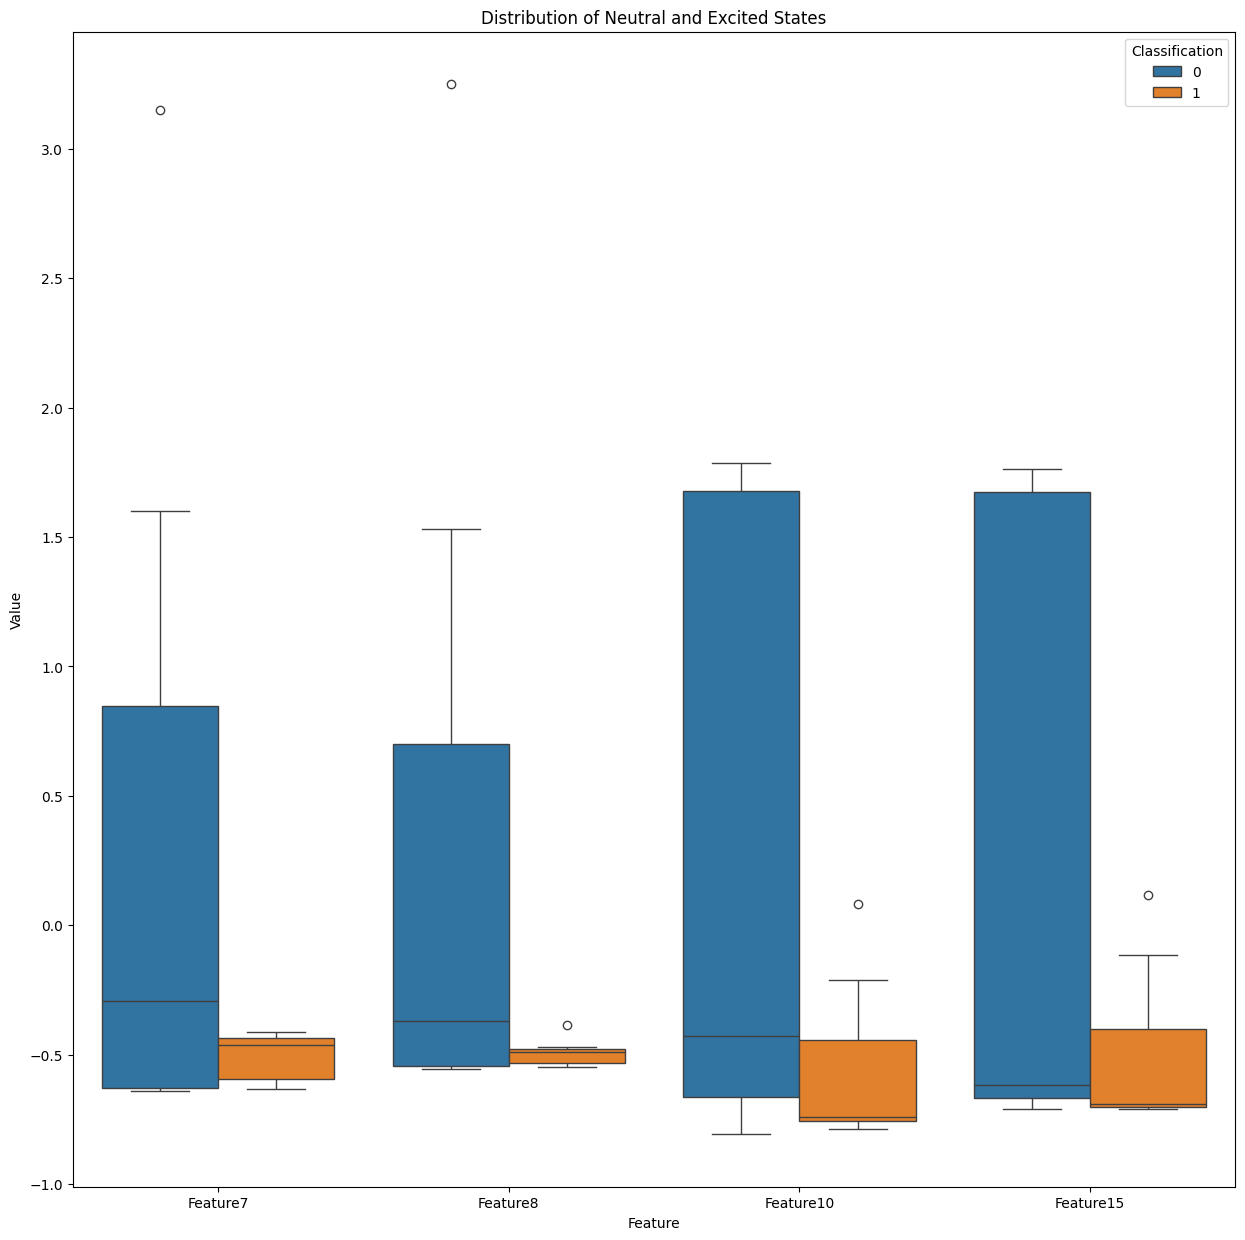

In [64]:
#Visualization Selected Features:
slected_features_elongated = selected_features.melt(
    id_vars='Classification',  
    var_name='Feature', 
    value_name='Value'
)

plt.figure(figsize=(15,15))
sns.boxplot(x="Feature",y="Value", hue="Classification", data=slected_features_elongated)
plt.title("Distribution of Neutral and Excited States")
plt.show()

In [70]:
'''
Legend: 
Feature 7: Delta Power AF8
Feature 8: Delta Power TP10
Feature 10: Beta Power AF7
Feature 15: Gamma Power AF8

The boxplots show significant difference in the distribution of the 4 features, for each state.
We can see that the mean of Excited State (Classification = 1) is always lower than the mean of Neutral State (Classification = 0).
This suggests that there is indeed a difference in the values of the selected feature for a person in their excited and neutral state.
Therefore, we can use these features to train a Machine Learning Model for classification tasks.
'''

'\nLegend: \nFeature 7: Delta Power AF8\nFeature 8: Delta Power TP10\nFeature 10: Beta Power AF7\nFeature 15: Gamma Power AF8\n\nThe boxplots show significant difference in the distribution of the 4 features, for each state.\nWe can see that the mean of Excited State (Classification = 1) is always lower than the mean of Neutral State (Classification = 0).\nThis suggests that there is indeed a difference in the values of the selected feature for a person in their excited and neutral state.\n'

In [154]:
# TRAINING SUPPORT VECTOR MACHINE

# Test Train Split
X = selected_features.iloc[:,:-1]
Y = selected_features.iloc[:,-1]

#Model
svm_model = svm.SVC(kernel="rbf")

#Training
criteria = LeaveOneOut()
scores = cross_val_score(svm_model, X, Y, cv=criteria, scoring='accuracy')

#Prediction
average_accuracy = cross_val_score(svm_model,X, Y).mean()
print("Mean Accuracy: ", average_accuracy)

Mean Accuracy:  0.9
